In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from pandas.plotting import table

import sys

# Add the path to the constants file to the system path
sys.path.append('../../')
from constants import *


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
import pandas as pd

# Existing data with updated structure to include CI and standard error
data = {
    "Methods": ["MF [1]", "MLP [2]", "Paper's (zero-shot) [3]", "Paper's (few-shot) [3]", 
                "Thu's OpenAI embedding", "Thu's zero-shot GPT (updated)", "Thu's few-shot GPT (updated)", 
                "Thu's OpenAI embedding", "Thu's zero-shot GPT", "Thu's few-shot GPT", 
                "Thu's few-shot GPT (1 test/user)"],
    "Dataset": ["Unknown", "Unknown", "Unknown Amazon", "Unknown Amazon", "Small Amazon", 
                "Small Amazon", "Small Amazon", "Large Amazon", "Large Amazon", 
                "Large Amazon", "Large Amazon"],
    "Features": ["title", "title", "title", "title", "title", "title", "title", 
                 "title", "title", "title", "title"],
    "RMSE": [1.1973, 1.3078, 1.4059, 1.0751, 1.6036, 3.5732, 4.5403, 0.6240, 
             1.1344, 0.7185, 0.6445],
    "CI_RMSE": ["-", "-", "-", "-", "-", "(3.1436, 3.9779)", "(3.5214, 5.0000)", "-", 
                "-", "-", "-"],
    "StdError_RMSE": ["-", "-", "-", "-", "-", 0.0041, 0.0084, "-", "-", "-", "-"],
    "MAE": [0.9461, 0.9597, 1.1861, 0.6977, 1.1429, 3.2331, 4.3999, 0.3107, 
            1.0118, 0.3259, 0.2226],
    "CI_MAE": ["-", "-", "-", "-", "-", "(2.7059, 3.7353)", "(3.2000, 5.0000)", "-", 
               "-", "-", "-"],
    "StdError_MAE": ["-", "-", "-", "-", "-", 0.0052, 0.0105, "-", "-", "-", "-"],
    "Wall Time": ["-", "-", "-", "-", "47.9 ms", "5min 30s", "13.2 s", "1h 25min 35s", 
                  "13h 14min 39s", "9h 36min 7s", "15h 37s"]
}

# Adding the new user based CF method for Small Amazon
data["Methods"].append("Small Amazon user based CF")
data["Dataset"].append("Small Amazon")
data["Features"].append("all")
data["RMSE"].append(3.6340)
data["CI_RMSE"].append("(2.6458, 4.4721)")
data["StdError_RMSE"].append(0.0100)
data["MAE"].append(3.4108)
data["CI_MAE"].append("(2.2000, 4.4000)")
data["StdError_MAE"].append(0.0119)
data["Wall Time"].append("10min 21s")

# New rows to add to the DataFrame
new_rows = [
    {
        "Methods": "Thu's zero-shot GPT", 
        "Dataset": "Small Amazon", 
        "Features": "all", 
        "RMSE": 2.413198999619531, 
        "CI_RMSE": "-", 
        "StdError_RMSE": "-",
        "MAE": 2.0, 
        "CI_MAE": "-", 
        "StdError_MAE": "-",
        "Wall Time": "4min 6s"
    },
    {
        "Methods": "Thu's few-shot GPT", 
        "Dataset": "Small Amazon", 
        "Features": "all", 
        "RMSE": 2.5773740789526736, 
        "CI_RMSE": "-", 
        "StdError_RMSE": "-",
        "MAE": 1.7857142857142858, 
        "CI_MAE": "-", 
        "StdError_MAE": "-",
        "Wall Time": "1min 2s"
    },
    {
        "Methods": "Thu's few-shot GPT (1 test/user)", 
        "Dataset": "Small Amazon", 
        "Features": "all", 
        "RMSE": 2.5773740789526736, 
        "CI_RMSE": "-", 
        "StdError_RMSE": "-",
        "MAE": 1.7857142857142858, 
        "CI_MAE": "-", 
        "StdError_MAE": "-",
        "Wall Time": "31 s"
    }
]

# Convert the existing data dictionary to a DataFrame
df = pd.DataFrame(data)

# Concatenate new rows to the DataFrame
df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

# Update large Amazon few-shot
large_amazon_few_shot_index = df[(df['Methods'] == "Thu's few-shot GPT") & (df['Dataset'] == "Large Amazon")].index[0]
df.at[large_amazon_few_shot_index, 'RMSE'] = 3.1255
df.at[large_amazon_few_shot_index, 'CI_RMSE'] = "(3.0543, 3.1957)"
df.at[large_amazon_few_shot_index, 'StdError_RMSE'] = 0.0007
df.at[large_amazon_few_shot_index, 'MAE'] = 2.6423
df.at[large_amazon_few_shot_index, 'CI_MAE'] = "(2.5609, 2.7220)"
df.at[large_amazon_few_shot_index, 'StdError_MAE'] = 0.0008
df.at[large_amazon_few_shot_index, 'Wall Time'] = "6h 16min 2s"

# Export table to LaTeX
df.style.to_latex("../latex/amazon_table.tex")

# Display the best RMSE & MAE
best_rmse = df['RMSE'].min()
best_mae = df['MAE'].min()
print(f'The best RMSE is {best_rmse} and the best MAE is {best_mae}')

# Display the updated DataFrame
df

The best RMSE is 0.624 and the best MAE is 0.2226


,Methods,Dataset,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
0,MF [1],Unknown,title,1.197300,-,-,0.946100,-,-,-
1,MLP [2],Unknown,title,1.307800,-,-,0.959700,-,-,-
2,Paper's (zero-shot) [3],Unknown Amazon,title,1.405900,-,-,1.186100,-,-,-
3,Paper's (few-shot) [3],Unknown Amazon,title,1.075100,-,-,0.697700,-,-,-
4,Thu's OpenAI embedding,Small Amazon,title,1.603600,-,-,1.142900,-,-,47.9 ms
5,Thu's zero-shot GPT (updated),Small Amazon,title,3.573200,"(3.1436, 3.9779)",0.0041,3.233100,"(2.7059, 3.7353)",0.0052,5min 30s
6,Thu's few-shot GPT (updated),Small Amazon,title,4.540300,"(3.5214, 5.0000)",0.0084,4.399900,"(3.2000, 5.0000)",0.0105,13.2 s
7,Thu's OpenAI embedding,Large Amazon,title,0.624000,-,-,0.310700,-,-,1h 25min 35s
8,Thu's zero-shot GPT,Large Amazon,title,1.134400,-,-,1.011800,-,-,13h 14min 39s
9,Thu's few-shot GPT,Large Amazon,title,3.125500,"(3.0543, 3.1957)",0.0007,2.642300,"(2.5609, 2.7220)",0.0008,6h 16min 2s


In [9]:
# Split the dataframe into small groups based on "Dataset" and "Features" and export table image

# Small Amazon
df_small = df[df["Dataset"] == "Small Amazon"]
df_small = df_small.drop(columns=["Dataset"])
df_small = df_small.set_index("Methods")
df_small = df_small.round(2)

# export table to latex
df_small.style.to_latex("../latex/small_amazon_table.tex")

# best RMSE & MAE
print(f'The best RMSE is {df_small["RMSE"].min()} and the best MAE is {df_small["MAE"].min()}')

df_small

The best RMSE is 1.6 and the best MAE is 1.14


,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
Thu's OpenAI embedding,title,1.60,-,-,1.14,-,-,47.9 ms
Thu's zero-shot GPT (updated),title,3.57,"(3.1436, 3.9779)",0.0041,3.23,"(2.7059, 3.7353)",0.0052,5min 30s
Thu's few-shot GPT (updated),title,4.54,"(3.5214, 5.0000)",0.0084,4.40,"(3.2000, 5.0000)",0.0105,13.2 s
Small Amazon user based CF,all,3.63,"(2.6458, 4.4721)",0.01,3.41,"(2.2000, 4.4000)",0.0119,10min 21s
Thu's zero-shot GPT,all,2.41,-,-,2.00,-,-,4min 6s
Thu's few-shot GPT,all,2.58,-,-,1.79,-,-,1min 2s
Thu's few-shot GPT (1 test/user),all,2.58,-,-,1.79,-,-,31 s


In [10]:
# Large Amazon
df_large = df[df["Dataset"] == "Large Amazon"]
df_large = df_large.drop(columns=["Dataset"])
df_large = df_large.set_index("Methods")
df_large = df_large.round(2)

# best RMSE & MAE
print(f'The best RMSE is {df_large["RMSE"].min()} and the best MAE is {df_large["MAE"].min()}')

# export table latex
df_large.style.to_latex("../latex/amazon_table_large.tex")

df_large

The best RMSE is 0.62 and the best MAE is 0.22


,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
Thu's OpenAI embedding,title,0.62,-,-,0.31,-,-,1h 25min 35s
Thu's zero-shot GPT,title,1.13,-,-,1.01,-,-,13h 14min 39s
Thu's few-shot GPT,title,3.13,"(3.0543, 3.1957)",0.0007,2.64,"(2.5609, 2.7220)",0.0008,6h 16min 2s
Thu's few-shot GPT (1 test/user),title,0.64,-,-,0.22,-,-,15h 37s


In [11]:
# Baseline Unknown or Unknown Amazon
df_baseline = df[(df["Dataset"] == "Unknown") | (df["Dataset"] == "Unknown Amazon")]
df_baseline = df_baseline.drop(columns=["Dataset"])
df_baseline = df_baseline.set_index("Methods")
df_baseline = df_baseline.round(2)

# export table latex
df_baseline.style.to_latex("../latex/baseline_table.tex")

df_baseline

,Features,RMSE,CI_RMSE,StdError_RMSE,MAE,CI_MAE,StdError_MAE,Wall Time
Methods,,,,,,,,
MF [1],title,1.20,-,-,0.95,-,-,-
MLP [2],title,1.31,-,-,0.96,-,-,-
Paper's (zero-shot) [3],title,1.41,-,-,1.19,-,-,-
Paper's (few-shot) [3],title,1.08,-,-,0.70,-,-,-


In [12]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

# Table from DataFrame
tab = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))

# Adjust table
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)

plt.box(on=None)

# Save the figure as an image
image_path = "../images/evaluation_table.png"
plt.savefig(image_path, bbox_inches='tight', dpi=300)

# Close the plt object to prevent it from displaying in the output cell
plt.close()


Plot saved


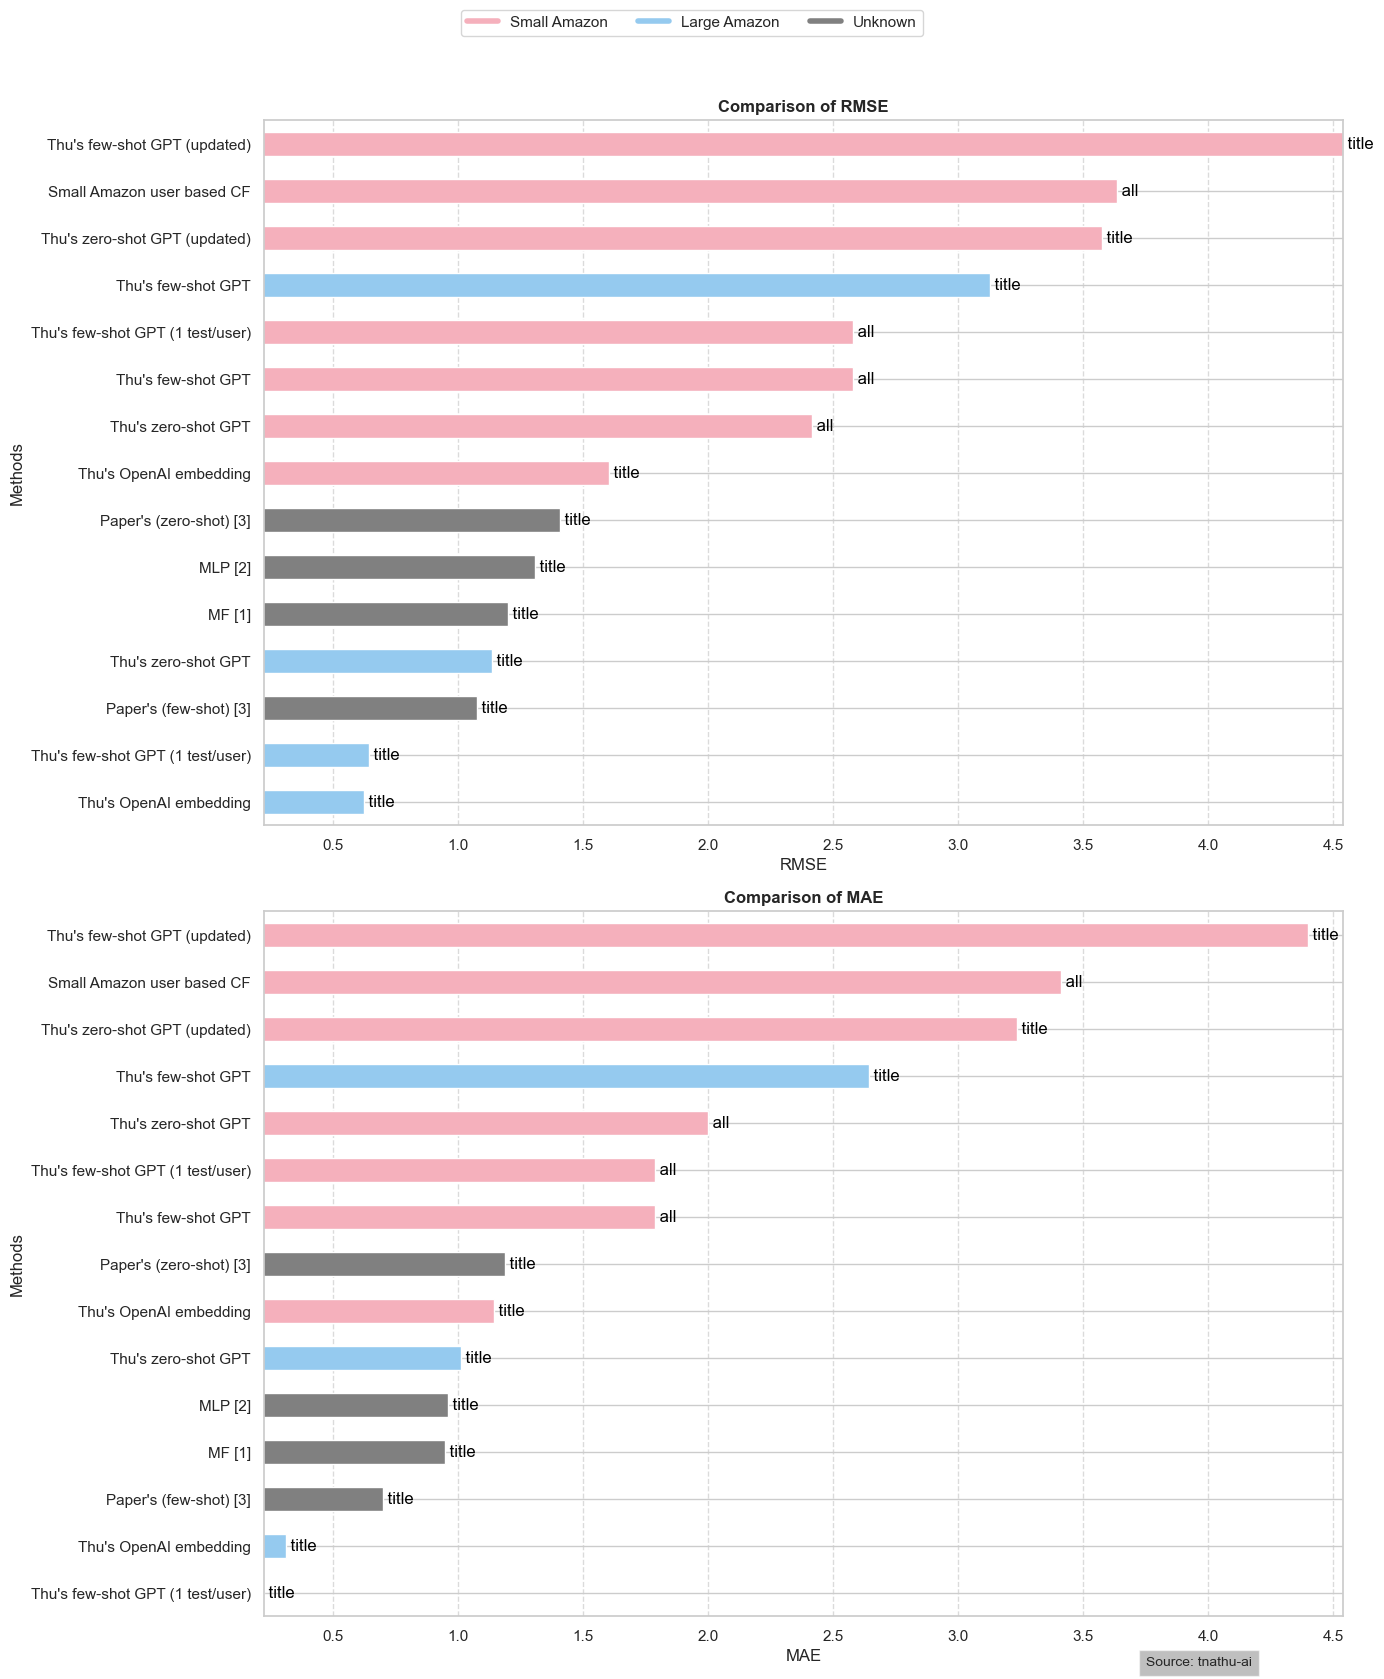

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
base_palette = sns.color_palette("husl", 3)
small_amazon_base_color = base_palette[0]  # Base color for Small Amazon
large_amazon_base_color = base_palette[2]  # Base color for Large Amazon

# Create lighter colors
small_amazon_color = sns.light_palette(small_amazon_base_color, n_colors=3)[-2]  # Lighter color for Small Amazon
large_amazon_color = sns.light_palette(large_amazon_base_color, n_colors=3)[-2]  # Lighter color for Large Amazon

# Create a color map: a dictionary that maps each unique value in 'Dataset' to a color
color_map = {'Small Amazon': small_amazon_color, 'Large Amazon': large_amazon_color}

# Assuming 'df' is your DataFrame and it has columns named 'Dataset', 'RMSE', 'MAE', and 'Methods'
# Map the 'Dataset' column to colors using the color map, handling NaN values
df['color'] = df['Dataset'].map(color_map).fillna("grey")  # Grey color for NaN values

# Update the max and min scale of RMSE and MAE
max_rmse_mae = max(df['RMSE'].max(), df['MAE'].max())
min_rmse_mae = min(df['RMSE'].min(), df['MAE'].min())

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 16))

# RMSE Plot
df.sort_values(by="RMSE").plot.barh(x="Methods", y="RMSE", ax=ax[0], legend=False, color=df.sort_values(by="RMSE")['color'])
ax[0].set_title("Comparison of RMSE", fontweight='bold')
ax[0].set_xlabel("RMSE")
ax[0].set_ylabel("Methods")
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="RMSE")['RMSE']):
    ax[0].text(value, index, ' ' + df.sort_values(by="RMSE")['Features'].iloc[index], color='black', va="center")

# MAE Plot
df.sort_values(by="MAE").plot.barh(x="Methods", y="MAE", ax=ax[1], legend=False, color=df.sort_values(by="MAE")['color'])
ax[1].set_title("Comparison of MAE", fontweight='bold')
ax[1].set_xlabel("MAE")
ax[1].set_ylabel("Methods")
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="MAE")['MAE']):
    ax[1].text(value, index, ' ' + df.sort_values(by="MAE")['Features'].iloc[index], color='black', va="center")

# Add legend
legend_elements = [Line2D([0], [0], color=small_amazon_color, lw=4, label='Small Amazon'),
                   Line2D([0], [0], color=large_amazon_color, lw=4, label='Large Amazon'),
                   Line2D([0], [0], color='grey', lw=4, label='Unknown')]

fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

# Citing the source to the right below the plot
plt.figtext(0.9, 0.01, "Source: tnathu-ai", ha="right", fontsize=10, bbox={"facecolor":"grey", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.savefig('../images/comparison_plot.png')
print("Plot saved")
plt.show()


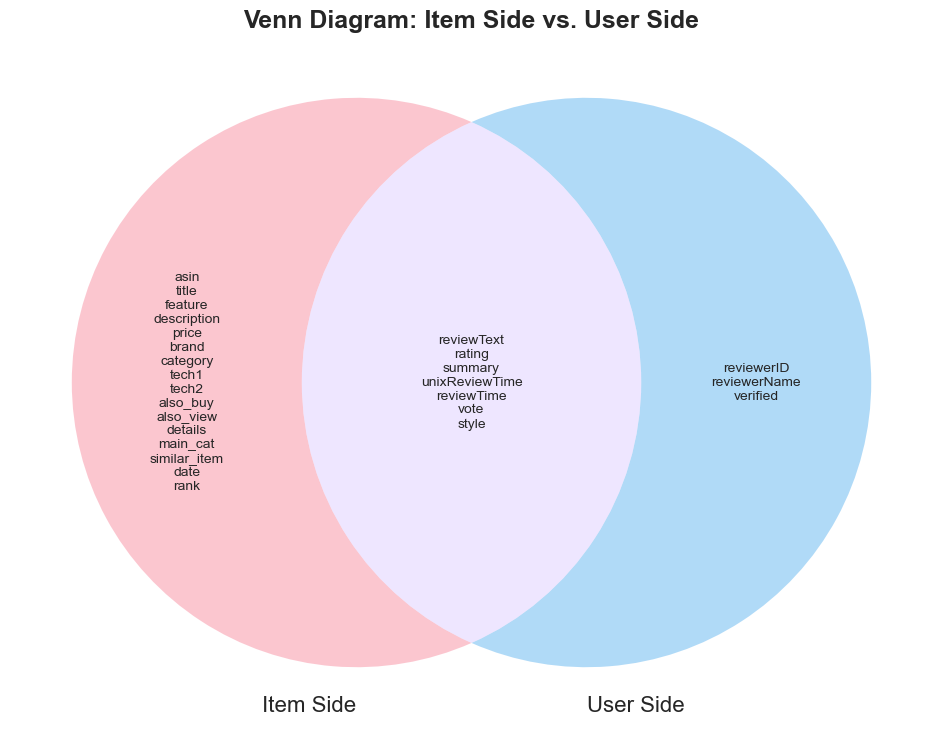

In [5]:
# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette 
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.show()


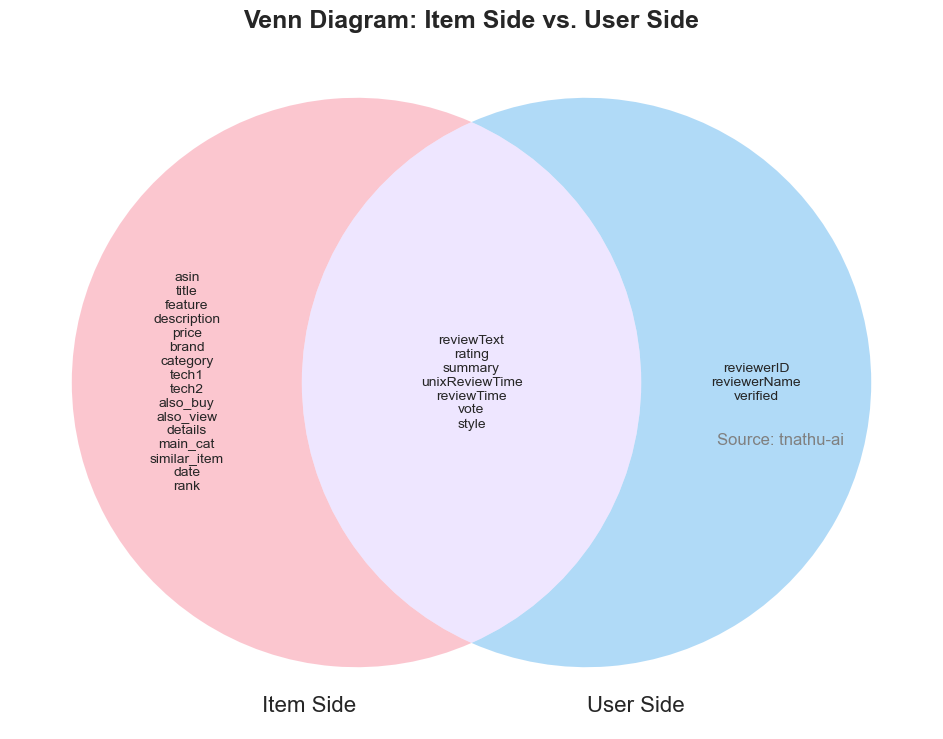

In [7]:
# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Add the source citation in gray
plt.text(0.5, -0.1, "Source: tnathu-ai", fontsize=12, color='gray', ha='center')

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
# plt.savefig('../images/interaction_venn_diagram.png')  # Save the plot
plt.show()
